In [1]:
import pandas as pd
import numpy as np
df =pd.read_csv("nba.csv")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0.0,PG,25.0,6-2,180.0,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99.0,SF,25.0,6-6,235.0,Marquette,6796117.0
2,John Holland,Boston Celtics,30.0,SG,27.0,6-5,205.0,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28.0,SG,22.0,6-5,185.0,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8.0,PF,29.0,6-10,231.0,NaN,5000000.0


In [3]:
#basic usage
pivot = np.round(pd.pivot_table(df, values='Salary', 
                                index='Team', 
                                columns='Position', 
                                aggfunc=np.mean),2)
pivot.head()

Position,C,PF,PG,SF,SG
Team,,,,,
Atlanta Hawks,7585416.67,5988067.00,4881700.00,3000000.0,2607758.00
Boston Celtics,2450465.00,6056986.67,4974651.50,6796117.0,2107996.67
Brooklyn Nets,10318138.00,3576204.75,2915758.67,NaN,1473350.67
Charlotte Hornets,6772240.00,4685770.00,4776151.67,6331404.0,4661406.20
Chicago Bulls,10424380.00,3361007.40,11171532.00,1958160.0,5717549.25


In [5]:
pivot = np.round(pd.pivot_table(df, values='Salary', 
                                index=['Team', 'College'], 
                                columns=['Position'], 
                                aggfunc=np.mean,
                                fill_value=0),2)
pivot.head()

Position                             C        PF  PG   SF       SG
Team          College                                             
Atlanta Hawks Bucknell               0    947276   0  0.0        0
              Creighton              0         0   0  0.0  5746479
              Florida         12000000         0   0  0.0        0
              Kansas                 0         0   0  0.0  2854940
              Louisiana Tech         0  18671659   0  0.0        0

<AxesSubplot:title={'center':'Mean Salary by Team and Position'}, ylabel='Team'>

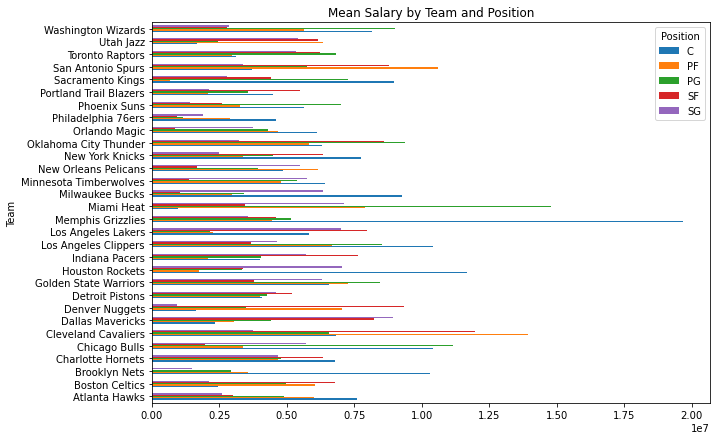

In [6]:
np.round(pd.pivot_table(df, values='Salary', 
                                index=['Team'], 
                                columns=['Position'], 
                                aggfunc=np.mean,
                                fill_value=0),2).plot.barh(figsize=(10,7),
                                                          title='Mean Salary by Team and Position')


In [7]:
pivot =np.round(pd.pivot_table(df, values='Salary', 
                                index=['Team'], 
                                columns=['Position'], 
                                aggfunc=[np.mean, np.median],
                                fill_value=0),2)
pivot.head()

mean                                      \
Position                     C          PF           PG         SF   
Team                                                                 
Atlanta Hawks       7585416.67  5988067.00   4881700.00  3000000.0   
Boston Celtics      2450465.00  6056986.67   4974651.50  6796117.0   
Brooklyn Nets      10318138.00  3576204.75   2915758.67        0.0   
Charlotte Hornets   6772240.00  4685770.00   4776151.67  6331404.0   
Chicago Bulls      10424380.00  3361007.40  11171532.00  1958160.0   

                                 median                                    \
Position                   SG         C         PF          PG         SF   
Team                                                                        
Atlanta Hawks      2607758.00   9756250  2166666.5   4881700.0  3000000.0   
Boston Celtics     2107996.67   2569260  5000000.0   5171954.5  6796117.0   
Brooklyn Nets      1473350.67  10318138  1060794.0   1500000.0        0.0   
Charlotte Hornets  4661406.20   4204200  6110034.0   2139000.0  6331404.0   
Chicago Bulls      5717549.25  10424380  1391160.0  11171532.0  1958160.0   

                              
Position                  SG  
Team                          
Atlanta Hawks      2079730.0  
Boston Celtics     1749840.0  
Brooklyn Nets      1417740.0  
Charlotte Hornets  3034356.0  
Chicago Bulls      2757710.5

In [9]:

pivot=np.round(pd.pivot_table(df, values='Salary', 
                                index=['Team'], 
                                columns=['Position'], 
                                aggfunc=[np.sum],
                                fill_value=0,
                                margins=True, margins_name='Total'),2)
pivot.tail()

sum                                              \
Position                    C         PF         PG         SF         SG   
Team                                                                        
San Antonio Spurs    14897276   21188187   17267197   17550380   13539693   
Toronto Raptors       9316482   11913852   20509360   18677917   10700000   
Utah Jazz             5023156   19014800    9769293   18440918   10811924   
Washington Wizards   24490429   11300000   18022415   11158800   11356992   
Total               465430056  442560850  446848971  408020976  396976258   

                                  
Position                   Total  
Team                              
San Antonio Spurs   8.444273e+07  
Toronto Raptors     7.111761e+07  
Utah Jazz           6.306009e+07  
Washington Wizards  7.632864e+07  
Total               2.159837e+09

In [15]:
pivot = np.round(pd.pivot_table(df, values=['Salary', 'Weight'], 
                                index=['Team'], 
                                aggfunc=np.mean,
                                fill_value=0),2)

pivot.style.format({'Salary':'${0:,.0f}',
                   'Weight':'{0:,.0f}lb'})

,Salary,Weight
Team,,
Atlanta Hawks,"$4,860,197",221lb
Boston Celtics,"$4,181,505",219lb
Brooklyn Nets,"$3,501,898",216lb
Charlotte Hornets,"$5,222,728",220lb
Chicago Bulls,"$5,785,559",219lb
Cleveland Cavaliers,"$7,642,049",228lb
Dallas Mavericks,"$4,746,582",227lb
Denver Nuggets,"$4,294,424",218lb
Detroit Pistons,"$4,477,884",222lb


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      457 non-null    object 
 1   Team      457 non-null    object 
 2   Number    457 non-null    float64
 3   Position  457 non-null    object 
 4   Age       457 non-null    float64
 5   Height    457 non-null    object 
 6   Weight    457 non-null    float64
 7   College   373 non-null    object 
 8   Salary    446 non-null    float64
dtypes: float64(4), object(5)
memory usage: 32.3+ KB
